In [1]:
pwd

u'/Users/Rohit/MSIS2802-DataScience'

## Import Required Libraries

In [21]:
import pandas as pd
import numpy as np
import redis
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/Rohit/Desktop/airbnb_session_data.txt', delimiter='|')

## Data Description
id_visitor - id of the visitor 

id_session - id of the session 

dim_session_number - the number of session on a given day for a visitor 

dim_user_agent - user agent of the session 

dim_device_app_combo - parsed out device/app combo from user agent ds date stamp of session 

ts_min - time of session start 

ts_max - time of session end 

did_search - binary flag indicating if the visitor performed a search during the session 

sent_message - binary flag indicating if the visitor sent a message during the session 

sent_booking_request - binary flag indicating if the visitor sent a booking request during the session

-

Here are some basics on the dataset:

    Number of records in data: 7756
    Date span of the data: ['2014-05-05', '2015-04-23']
    Number of unique users in data: 630
    Number of unique sessions in data: 7756
    Percent of sessions with search: 15.9%
    Percent of sessions with sent message: 16.5%
    Percent of sessions with booking request: 1.9%

In [38]:
df.shape

(7756, 21)

## Checking Out The Diversity of the Data set

In [7]:
for col in df:
    print(col, "-", len(df[col].unique()))

id_visitor - 630
id_session - 7756
dim_session_number - 702
dim_user_agent - 786
dim_device_app_combo - 17
ds - 349
ts_min - 7481
ts_max - 7536
did_search - 2
sent_message - 2
sent_booking_request - 2
next_id_session - 5396
next_dim_session_number - 702
next_dim_user_agent - 665
next_dim_device_app_combo - 17
next_ds - 346
next_ts_min - 6853
next_ts_max - 6911
next_did_search - 3
next_sent_message - 3
next_sent_booking_request - 3


In [16]:
activeUsers = pd.DataFrame(columns=('UserID','Freq'))
for x in df.id_visitor.unique():
    activeUsers = activeUsers.append(pd.Series([x, df[df.id_visitor == x].shape[0]], index=['UserID','Freq']), ignore_index=True)
activeUsers.index = activeUsers.UserID
activeUsers = activeUsers[['Freq']]
activeUsers.shape

(630, 1)

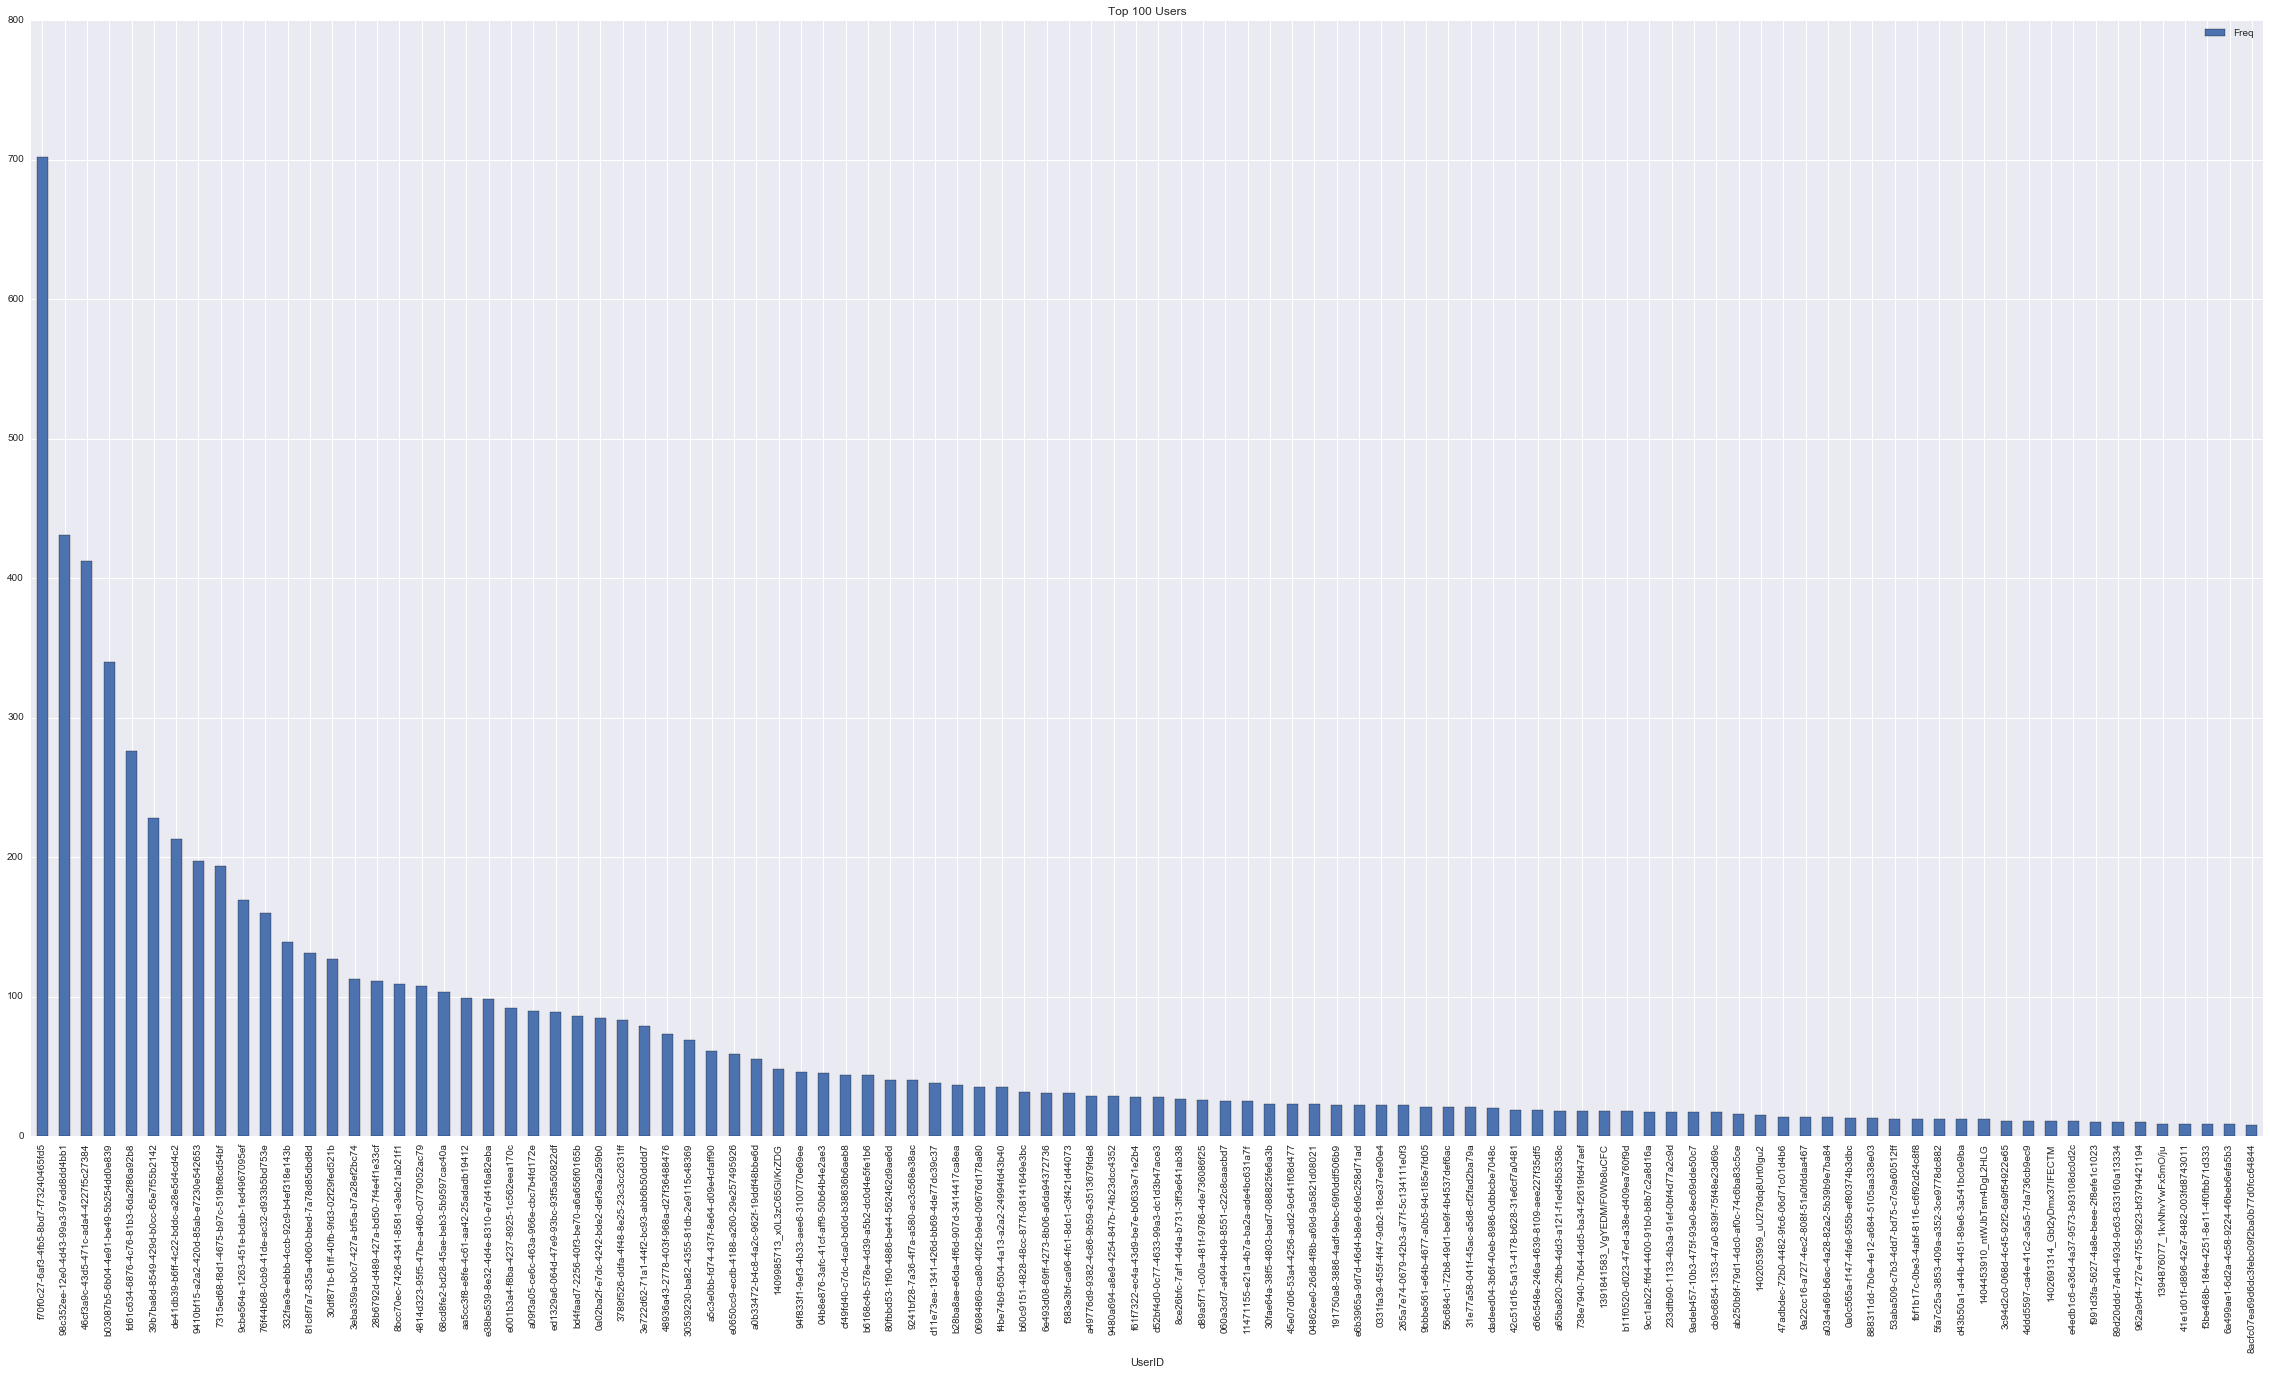

In [34]:
activeUsers.sort_values(by='Freq', ascending=False).head(100).plot(kind='bar', figsize=(40,20), title="Top 100 Users")
plt.xlabel("User IDs")
plt.ylabel("Number of Visits")

Freq    89.0
Name: ed1329a6-064d-47e9-93bc-93f5a50822df, dtype: float64